In [1]:
import csv
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import sys
print(sys.path)

['', '/Users/selmachraibi/anaconda/lib/python35.zip', '/Users/selmachraibi/anaconda/lib/python3.5', '/Users/selmachraibi/anaconda/lib/python3.5/plat-darwin', '/Users/selmachraibi/anaconda/lib/python3.5/lib-dynload', '/Users/selmachraibi/.local/lib/python3.5/site-packages', '/Users/selmachraibi/anaconda/lib/python3.5/site-packages', '/Users/selmachraibi/anaconda/lib/python3.5/site-packages/Sphinx-1.4.1-py3.5.egg', '/Users/selmachraibi/anaconda/lib/python3.5/site-packages/aeosa', '/Users/selmachraibi/anaconda/lib/python3.5/site-packages/auto_sklearn-0.1.0-py3.5-macosx-10.6-x86_64.egg', '/Users/selmachraibi/anaconda/lib/python3.5/site-packages/smac-0.0.1-py3.5.egg', '/Users/selmachraibi/anaconda/lib/python3.5/site-packages/pyautoweka-.1-py3.5.egg', '/Users/selmachraibi/pyautoweka/hyperopt-sklearn/hyperopt', '/Users/selmachraibi/anaconda/lib/python3.5/site-packages/future-0.16.0-py3.5.egg', '/Users/selmachraibi/anaconda/lib/python3.5/site-packages/pymongo-3.3.1-py3.5-macosx-10.6-x86_64.egg

In [3]:
path = 'hillary-clinton-emails/Emails.csv'
table_text = pd.read_csv(path)

Have a look at the name of the columns we have ...

In [4]:
table_text.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

# 1. WordCloud

After a quick look, we find that will work with column 'ExtractedBodyText'. We decided to not use 'ExtractedSubject' column, because we often already have it in the ExtractedBodyText, and it added typical email words like 'Re', 'Fw' that we don't want in our wordcloud. 


On the next cell, we group in a single string variable all the words. We have realised that all mails with less than 10 characters are useless.

In [5]:
text = ''
for i in np.arange(table_text.shape[0]):
    if (len(str(table_text.ExtractedBodyText[i])) > 10):
        text += ' ' + str(table_text.ExtractedBodyText[i])

### a) WordCloud by default generated by the WordCloud library

In [6]:
print(STOPWORDS)

{'', "you're", 'here', 'between', 'above', 'at', "he'd", 'ours', "doesn't", "you'll", 'same', 'no', 'themselves', 'all', 'his', 'www', "shouldn't", "couldn't", "let's", 'yourself', "when's", 'http', "he's", 'would', "she'll", "i'd", 'each', 'it', "won't", "hadn't", 'how', 'then', 'am', 'she', 'through', 'while', 'the', 'myself', 'could', 'did', 'himself', 'their', "we've", "he'll", 'of', 'up', 'do', 'were', 'a', 'for', 'and', "they'll", 'below', 'few', 'who', 'as', 'into', 'that', "it's", 'they', 'nor', 'such', 'are', 'any', "hasn't", 'most', "we'll", 'which', 'like', 'about', 'he', "can't", 'if', 'them', "you'd", 'cannot', 'again', 'we', 'itself', 'be', 'after', "where's", 'having', 'hers', 'off', 'should', "we're", 'you', 'down', 'me', 'has', 'before', 'there', 'but', 'herself', 'on', "you've", 'your', 'been', "isn't", 'under', "mustn't", 'being', 'yourselves', 'once', "aren't", 'com', 'so', "i've", 'just', 'other', 'until', 'over', 'ought', "here's", 'my', "she's", 'why', 'these', '

In [7]:
image = Image.open("hillary-logo.png")
image_mask = np.array(image)

In [8]:
wc = WordCloud(background_color="white", max_words=2000, mask=image_mask,
               stopwords=STOPWORDS)
# generate word cloud
wc.generate(text)
wc.to_file("wc1.png")

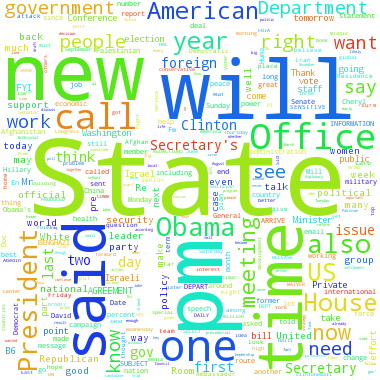

In [9]:
Image.open("wc1.png")

### Discussion:

Some unrelevant words and especially verbs as 'will', 'said', 'known', 'need' or 'made'. Also very usual nouns: 'day', 'also', 'two' or 'House'.

Vocabulary of emails structures: 'pm' (hour), 'Fw', 'Re' that are not present in the STOPWORD list given by WordCloud.

We can see also 'government' and 'gov' that could be stemmed. This is not done by WordCloud neither

### b) word cloud generated by a personnalized standard text pre-processing 

In [10]:
import nltk #, pprint
# au début j'ai utilisé lui...
from nltk import word_tokenize
#nltk.download('all')

In [11]:
import re

In [12]:
# Mais enfait lui est mieux ...
from nltk.tokenize import RegexpTokenizer

We also add manually stop_words adapted to our context.

In [15]:
from nltk.corpus import stopwords
email_list = ['fw', 're', 'pm', 'am']
usual_words = ['would','say', 'think', 'know', 'good', 'bad', 'talk', 'said', 'have', 'had','got', 'call', 'get', 'also', 'want', 'see']
days = ['monday','tuesday','wednesday', 'thursday', 'friday', 'saturday', 'sunday']
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september','october','november','december']
perso_stopwords = stopwords.words("english") + email_list + days + months + usual_words #+ single_characters 
stop_words = set(perso_stopwords)

In [16]:
lower_text = text.lower()

In [17]:
without_symbols = re.sub("[^a-zA-Z]", " ", lower_text)  

In [18]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(without_symbols)

In [19]:
type(tokens)

list

#### filtering

personnalized stopwords list.

In [20]:
without_stopwords = [words for words in tokens if not words in stop_words]

We remove single characters.

In [21]:
filtered_words = [words for words in without_stopwords if len(words) != 1]

#### stemming:
To convert all words to their root

In [22]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

In [23]:
stem = [lancaster.stem(t) for t in filtered_words]

In [24]:
filtered_words[100], stem[100]

('agreement', 'agr')

In [25]:
filtered_words[311], stem[311]

('commentators', 'com')

We did not use stemming because sometimes, we can't recognize words when they are cutted. Example : agreement -> agr ( 'agr' could be agriculture) or commentators -> com ( 'com' could be communication, commercial ..)

#### lemmatization : 

Plural and singular forms merged, conjugate verbs changed to their usual form..

In [26]:
lem = nltk.WordNetLemmatizer()
lemmed_text = [lem.lemmatize(t) for t in filtered_words]

In [27]:
new_text = " ".join(lemmed_text)

In [28]:
wc = WordCloud(background_color="black", max_words=2000, mask=image_mask,
               stopwords=STOPWORDS, max_font_size= 1000)
# generate word cloud
wc.generate(new_text)
wc.to_file("wc2.png")

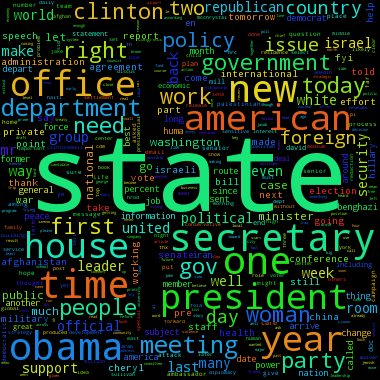

In [29]:
Image.open("wc2.png")

### Discussion:

We have more interesting terms like 'president', 'republican', 'obama', which were already in the first wordcloud, and  'issue', 'policy', 'security', 'country', 'foreign' that are new words. Finally, the more-used words are no more 'Pm' or 'Fw'.

# 2. Sentiment Analysis

In [39]:
import pycountry
import nltk.sentiment.util

We extract a second time the body text of the emails but this time we split them by sentences. Indeed, to be able to get the sentiment of a country we only need the sentence where it appears. An email may contains several countries and maing the sentiental analysis on it might corrupt the results.

In [40]:
table_text.reset_index()
emails = table_text.ExtractedBodyText.str.cat(sep='\n ').splitlines()

The pycountry.countries attribute returns a list of all the countries as follow:
- the name
- alpha_2: the acronym of the country in 2 letters
- alpha_3: the acronym of the country in 3 letters
- the official name

It contains in total 249 countries.

In [41]:
len(pycountry.countries)

249

To find the countries that appear in the emails, we use the most reccurent words that we found in Question 1 "new_text" and append them to a new list. It's a gain of time. 

In [42]:
countries= []

for country in pycountry.countries:
    if country.name.lower() in new_text:
        countries.append(country.name)
countries.append('United States')

We checked only with the feature "name" of pycountry.countries because we could have a lot of false negatives, for example CC in an email represent Carbon copy but it's also the accronym of country. That's why we decided to discard alpha_2 and alpha_3. Also, we noticed that the United States are not in the list.

In [43]:
countries = list(set(countries))

After removing the duplicates, we have 143 countries that appear in Hillary Clinton emails.

In [44]:
len(countries)

143

Now, we need to associate each couontry to the sentences where it appears. To do so, we browse the list "emails" and store the country and its corresponding lines in a dictionnary.

In [45]:
countries_lines = {}
for country in countries:
    for m in emails:
        if country in m:
            if country in countries_lines: #if the country is already a key we add the sentence to the existing line
                countries_lines[country] = countries_lines[country] + m
            else:#we create a new (key,value) in dict
                countries_lines[country] = m

One key-value of the dictionnary has the following form:

In [46]:
countries_lines['Spain']

'- NEW CALL King Juan Carlos of Spain called today and offered anytime today or tomorrow. His office relayed that it is aOnce security is established, opportunity can take root. Nations from Canada to Spain to Japan offered generous°- We appreciate the role Spain played in winning quick EU condemnation of the coup attempt.Honduras will take a lot of work. We hope Spain will work with us and the OAS to ensure a restoration of democraticbeini tWorwayi, and Solornunt (Spain).SpainSpain\'s centre-left prime minister, for the first time publicly queried the Blair candidacy by announcing that the centre leftwork with the new European figureheads when Spain assumes the Eti\'s six-month rotating presidency on 1 January, said2. Classical SpainGay marriage also is legal in Belgium, Canada, the Netherlands, Norway, Portugal, South Africa, Spain,Germany, the Netherlands, Spain and the United States.As you know, the EU-IMF-USG consensus hope motivating the Greek bailout is that it will buy time for

The preprocessing has been done, now we can process the sentiment analysis using the function "SentimentIntensityAnalyzer()" of the nltk library

In [47]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk.sentiment
analyze = SentimentIntensityAnalyzer()

We browse the dictionnary and for each entry (country) we compute the polarity score.
The function  "polarity_score" returns:
- a score for the positive sentiment
- a score for the negative sentiment
- a score for the neutral sentiment
- a compounded score of the positive and negative score (it equals 0 when there is only a neutral score)

In [48]:
sentiments_score = {}
for country in countries_lines.keys():
    sentiments_score[country] = analyze.polarity_scores(countries_lines[country])

sentiments = pd.DataFrame.from_dict(sentiments_score,'index')

To visualize the results we sort them and keep only the compounded score. The compounded score is the most accurate to express the sentiment.
Also, we need to attribute a weight for each country since they don't occur with the same frequency. To do so, we calculate the length of all the lines assigned to each country.

In [49]:
sentiments.reset_index(inplace =True)
sentiments.sort('compound',inplace = True)
sentiments['count'] = sentiments['index'].apply(lambda x : len(countries_lines[x]))
sentiments

/Users/selmachraibi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,index,neu,compound,pos,neg,count
57,Iraq,0.803,-0.9986,0.089,0.108,22088
73,Libya,0.814,-0.9965,0.084,0.102,21233
119,Sri Lanka,0.750,-0.9963,0.072,0.178,3049
25,Congo,0.813,-0.9878,0.054,0.133,2103
22,Chile,0.875,-0.9358,0.033,0.091,1465
64,Jordan,0.881,-0.9313,0.051,0.068,3287
136,Yemen,0.909,-0.8479,0.035,0.056,1655
138,Zimbabwe,0.767,-0.8316,0.000,0.233,217
130,Ukraine,0.911,-0.7892,0.022,0.067,845
129,Uganda,0.892,-0.7269,0.031,0.077,544


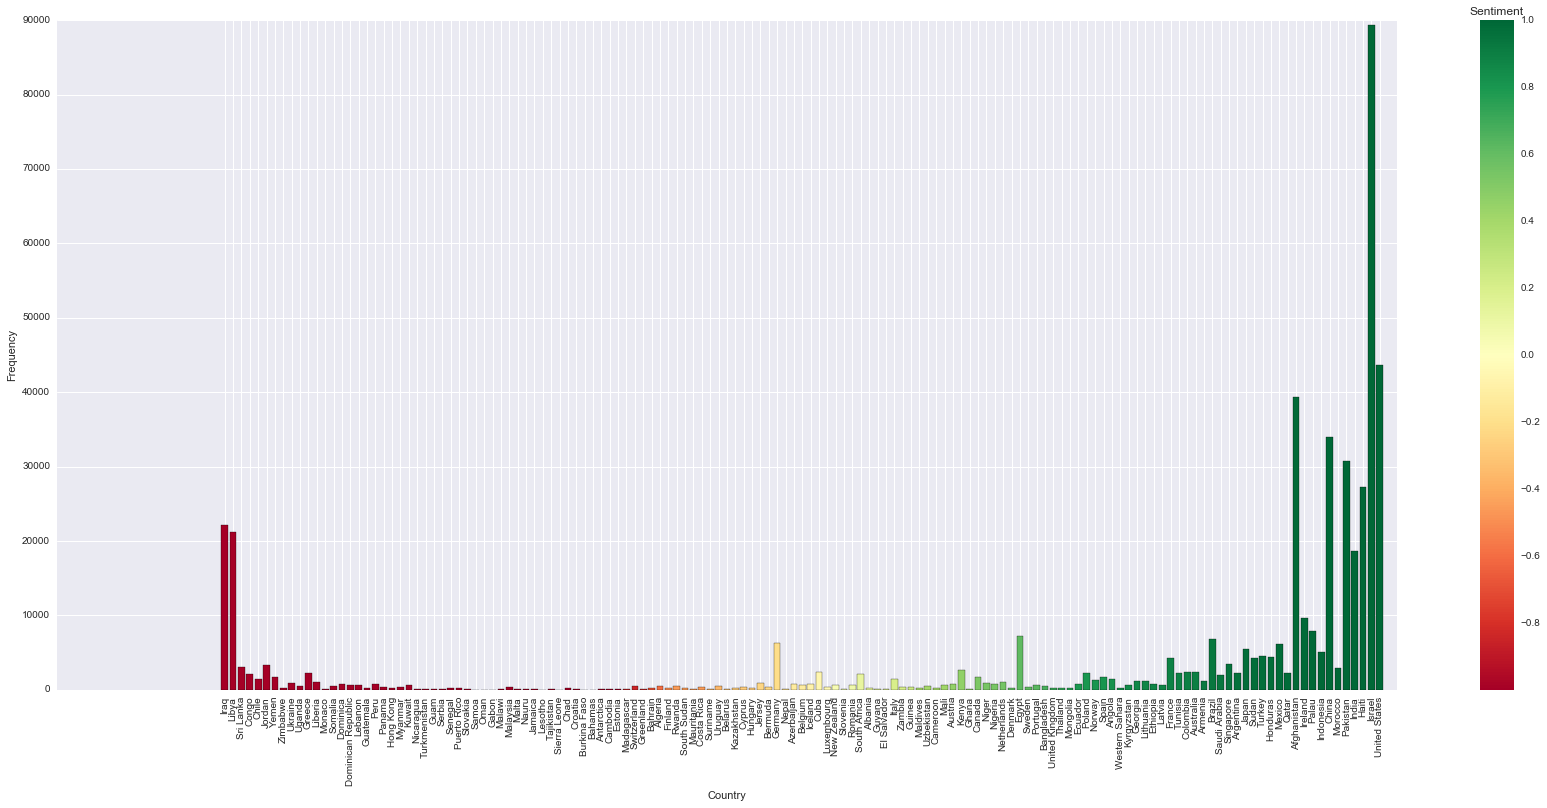

In [50]:
from matplotlib import cm
import seaborn as sb
%matplotlib inline
sb.set_context(rc={"figure.figsize": (30, 12)})

y = np.array(sentiments['compound'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(range(sentiments.shape[0]), sentiments['count'], align='center', tick_label=sentiments['index'], color=colors)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

The results obtained seem to be coherent with Hillary Clinton's opinion.

# 3. use of gensim library

In this section, we will run a statistical model called the 'Latent Dirichlet Model' to discover the abstracts topics that occurs in the collection of e-mails we have.

In [43]:
from gensim import corpora, models, similarities
import re

Same text prepocessing as in question 1 for the wordcloud, but this time we do it separatly for each e-mails ( Unlike question 1, where all e-mails were first concatenated into one string before text-prepocessing )

In [44]:
documents = []
for i in np.arange(table_text.shape[0]):
    if (len(str(table_text.ExtractedBodyText[i])) > 50):
        string = str(table_text.ExtractedBodyText[i])
        clean_string = re.sub("[^a-zA-Z]", " ",string.lower())
        documents.append(clean_string)
        


In [45]:
final_doc = [[lem.lemmatize(word) for word in document.split() if word not in stop_words] for document in documents]

NameError: name 'stop_words' is not defined

The Dictionary variable is necessary for running the Latent Dirichlet Allocation model estimation.

In [ ]:
dictionary = corpora.Dictionary(final_doc)
corpus = [dictionary.doc2bow(text) for text in final_doc]

We ran the algo for 5, 15 and 50 topics. We realized that the more topics we use, the more useless topics are selected. The best is probably with 5 topics.

#### 5 topics :

We notice one topic that represent well the main subjects of a presidential campain : 'Diplomacy', 'conflict', 'united' and 'state', 'nuclear', 'effort'.
One that represent the busy schedule of Secretary Clinton : 'office', 'arrive', 'route', 'conference', 'meeting', 'room'.

In [ ]:
lda_1 = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, passes = 3)

In [ ]:
lda_1.print_topics(6)

#### 15 topics
-Still interesting topics: - 'private organization' topic : number 2 -> 'today', 'forgot', 'flight', 'come', 'back', 'tommorrow'.
Or 'International conflict' topic : number 14 -> 'iraq', 'civilian', 'conflict', 'military', 'cheryl' (American Lawyer), 'force'.

But there are some unrelevant topics: number 4 or repetitive: number 5 also concern 'private organization'. Topic number 11 does not really make sense. This is more random subjects put together -> 'email', 'please', 'state', 'kosovo', 'today', 'limited', 'back', 'thank'...


In [ ]:
lda_2 = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15)

In [ ]:
lda_2.print_topics(15)

#### 50 topics 
Difficult to find an relevant topic..

Maybe the number 44 that shows that Secretary Clinton was doubting the security and the confidentiality of it's private e-mail adress.. -> 'sent', 'via', 'blackberry', 'release', 'declassify'

In [ ]:
lda3 = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=50)

In [ ]:
lda3.print_topics(100)[44]

# Question 4 (bonus) : The communication graph

In [11]:
import nltk 
import gensim
import pycountry
import networkx as nx
import pandas as pd
from collections import Counter
%matplotlib inline
import community as cm

In [2]:
aliases = pd.read_csv('hillary-clinton-emails/Aliases.csv')
del aliases['Id']
email_receivers = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')
del email_receivers['Id']
emails = pd.read_csv('hillary-clinton-emails/Emails.csv')
persons = pd.read_csv('hillary-clinton-emails/Persons.csv')

- First, we want to build an unweighted and undirected communication graph among the different email senders and recipients. We collect in a DataFrame all the informations about senders and receivers contained in the "emails" DataFrame that could be used.
- We also use the precious information given in the DataFame email_receivers.

In [3]:
information_senders_receivers = emails[['Id','SenderPersonId','ExtractedFrom','ExtractedTo','MetadataFrom','MetadataTo','ExtractedCc']]
information_senders_receivers.set_index(['Id'],inplace=True)

email_receivers.set_index(['EmailId'],inplace=True)

Then, we create a set "edges" which will contain edges of the graph (couples of the form [Sender , Receiver]), a set "id_mails_ok" which contain the id's of the emails for which we know the Id of the sender (from the column 'SenderPersonId' of "information_sender_receivers") AND the Id of the receiver (from email_receivers). The set "remaining_ids" contains id's of the mails for which the Id of the sender is missing from the column 'SenderPersonId' of "information_senders_receivers" or the Id of the receiver is missing from "email_receivers", so we have to search for it in the other columns of "information_sender_receivers". 

In [4]:
edges = set()
id_mails_ok = set(information_senders_receivers[information_senders_receivers.SenderPersonId.notnull()].index)&set(email_receivers.index.values)
remaining_ids = set(emails['Id'])-id_mails_ok

It is easy to retrieve the edges from the mails of id_mails_ok : 

In [5]:
for email_id in id_mails_ok : 
    
    sender = int(information_senders_receivers['SenderPersonId'].loc[email_id])
    receivers = email_receivers.loc[email_id].values
    
    if(len(receivers) == 1) : 
        edges.add((sender,receivers[0]))
        
    else :             
        for receiver in receivers :       
            edges.add((sender,receiver[0]))

At this point, we have retrieved 739 edges : 

In [6]:
len(edges)

739

To retrieve the remaining edges, we have to search in the other columns of "information_sender_receivers". 

NOTE : After doing our experiments, we have found that in fact there is no need to search for informations about the receiver in the columns : 'ExtractedTo' and 'MetadataTo', because the column 'ExtractedCc' contains all the information.

In [7]:
for email_id in remaining_ids : #In that case, either the sender or the receiver are NULL. 
    
    sender = information_senders_receivers['SenderPersonId'].loc[email_id]
    
    #If the sender is null, we try to find it in the dataframe :     
    if(pd.isnull(sender)) : 
        
        information_sender = information_senders_receivers.loc[email_id][['ExtractedFrom']]
        
        if((pd.notnull(information_sender['ExtractedFrom']) and information_sender['ExtractedFrom'] != 'B6')) : 
            
            name_sender = information_sender['ExtractedFrom'].split(',')[0]
            
            for index in persons.index : 
                
                if(name_sender in persons.loc[index].Name ) :
                    
                    sender = persons.loc[index].Id
                    break
                    
                    
      
    #If we didn't find any sender, no need to check for a receiver, we continue
    if(pd.isnull(sender)) : 
        continue
        
    #From now, we know that we found a sender
    
    
    #If we find the email ID in the email_receivers dataframe, we know that we can find a receiver : 
    if(email_id in email_receivers.index) :        
        
        receivers = email_receivers.loc[email_id].values
    
        if(len(receivers) == 1) : 
            edges.add((sender,receivers[0]))
        
        else :             
            for receiver in receivers :       
                edges.add((sender,receiver[0]))
                
        
    #If we don't find it, maybe we can find a receiver but we have to check in information_senders_receivers
    else : 
                
        information_receiver = information_senders_receivers.loc[email_id][['ExtractedTo', 'MetadataTo','ExtractedCc']]
        
        if(pd.notnull(information_receiver['ExtractedCc'])): 
            
            receivers = information_receiver['ExtractedCc'].split(';')
            
            for receiver in receivers :
                
                receiver = receiver.split(',')
                if(len(receiver)>1) : 
                    
                    name_receiver = receiver[0]
                    
                    for index in persons.index : 
                
                        if(name_receiver in persons.loc[index].Name ) :
                    
                            receiver = persons.loc[index].Id 
                            edges.add((sender,receiver))
                            break

We only retrieved 10 more edges. For all the remaining emails, the id's of the sender and the receiver are both null.

In [8]:
len(edges)

749

Now we use the NX library to draw the communication graph :

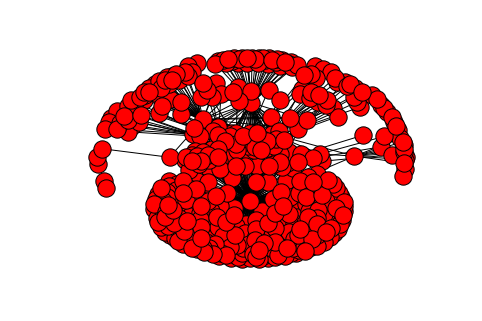

In [9]:
graph = nx.Graph()
graph.add_edges_from(edges)
nx.draw(graph,pos=nx.spring_layout(graph))

Due to the high number of vertices, the graph is not very clear. However, we can still remark a big community and smaller ones above. Let's now use the method best_partition of the community module and see the results : 

In [10]:
partition = cm.best_partition(graph)
partition

AttributeError: module 'community' has no attribute 'best_partition'

The result is a dictionnary where the keys are the id's of the people and the values are the community. We have 17 communities (0 to 16), and we suspect that the big community is the community 2. 

In [ ]:
print(set(partition.values()))

Now we want to print the 20 most frequent words used by the authors of each community :

In [ ]:
community_emails = {} #In this dictionary, the key is the community and the value is the set of email written 
                        #by someone in this community

for community in set(partition.values()): 
    
  
    emails_in_community = set()
    
    for index in emails.index :        
        if(partition.get(emails.loc[index]['SenderPersonId']) == community) :
            emails_in_community.add(emails.loc[index]['Id'])
     
    community_emails[community] = emails_in_community
    print('For community ', community, 'the number of email is : ', len(emails_in_community))
            
            

Because the number of emails for most communities is small, we will only study the case of communities 2,3,4,6,8,9,10. 

In [ ]:
emails.set_index(['Id'],inplace=True)

In [ ]:
for community in [2,3,4,6,8,9,10] :
    
    bag_of_words = str(emails.loc[list(community_emails[community])]['ExtractedBodyText'].values)
    
    #TRAITER LE TRUC ICI 

In [ ]:
bag_of_words

In [ ]:
#trouver un moyen darranger ca

def preprocess_bag_of_words(bag_of_words) :
    
    
    
    email_list = ['fw', 're', 'pm', 'am']
    usual_words = ['would','say', 'think', 'know', 'good', 'bad', 'talk', 'said', 'have', 'had','got', 'call', 'get', 'also', 'want', 'see']
    days = ['monday','tuesday','wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september','october','november','december']
    perso_stopwords = stopwords.words("english") + email_list + days + months + usual_words
    stop_words = set(perso_stopwords)
    
    bag_of_words = bag_of_words.lower()
    without_symbols = re.sub("[^a-zA-Z]", " ", bag_of_words) 
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(without_symbols)
    
    return tokens
    
    
    